# Automatic initialization of an allosteric network

Begin with a few package imports:

In [1]:
from IPython.display import HTML

import numpy as np
import matplotlib.pyplot as plt

from packing_utils import *
from allosteric_utils import *
from plot_imports import *

### Network generation

Generate a random contact network from a disk packing simulation to use as the elastic network:

In [2]:
n = 128 # number of disks/nodes
seed = 0
dim = 2

net = Packing(n, dim=dim, rfac=0.8, seed=seed)
net.params['contact'] = 0.05 # reduce the default contact repulsion
net.generate()

progress: 100%|########################################################| 1000.00/1000.00 [00:06<00:00]


Use the network graph to initialize an Allosteric Class object. Initially, the network has no sources or targets specified.

<IPython.core.display.Javascript object>


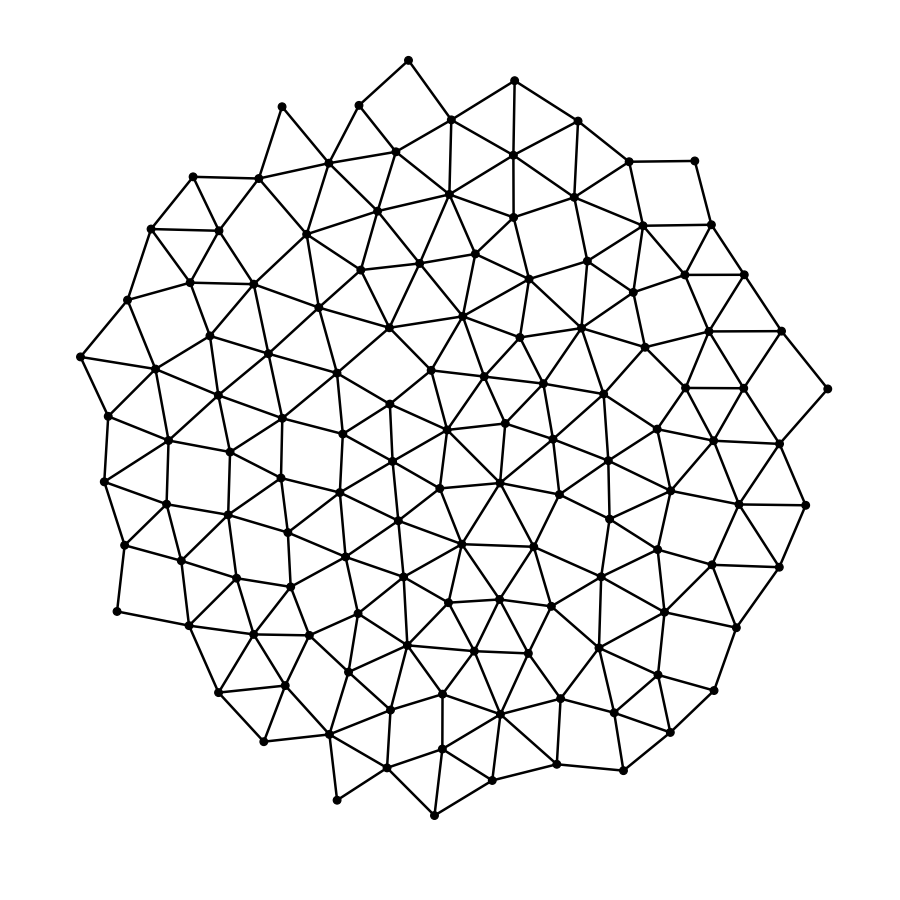

In [3]:
%matplotlib notebook

allo = Allosteric(net.graph, dim=dim)
allo.plot()

There are a number of ways we can automatically add sources or targets. A call to ```allo.add_sources()``` or ```allo.add_targets()``` places one source or target, respectively, at random in the network, and the edge joining the node pair is removed. Sources will be colored blue, and targets red. Here we also include a random seed for reproducibility.

<IPython.core.display.Javascript object>


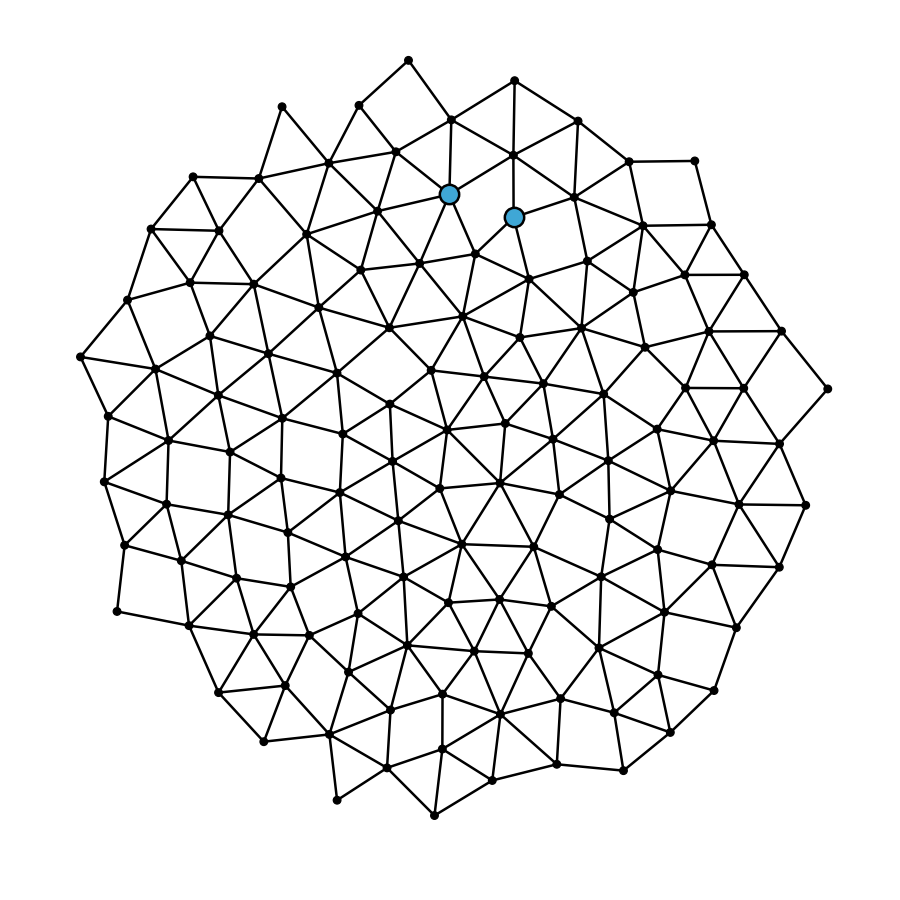

In [4]:
allo.add_sources(seed=12)

Suppose we'd like to place a target somewhere on the boundary. We can do so by specifying ```boundary=True```. This will attempt to place a target (or source) on the boundary satisfying a minimum number of bonds per node.

<IPython.core.display.Javascript object>


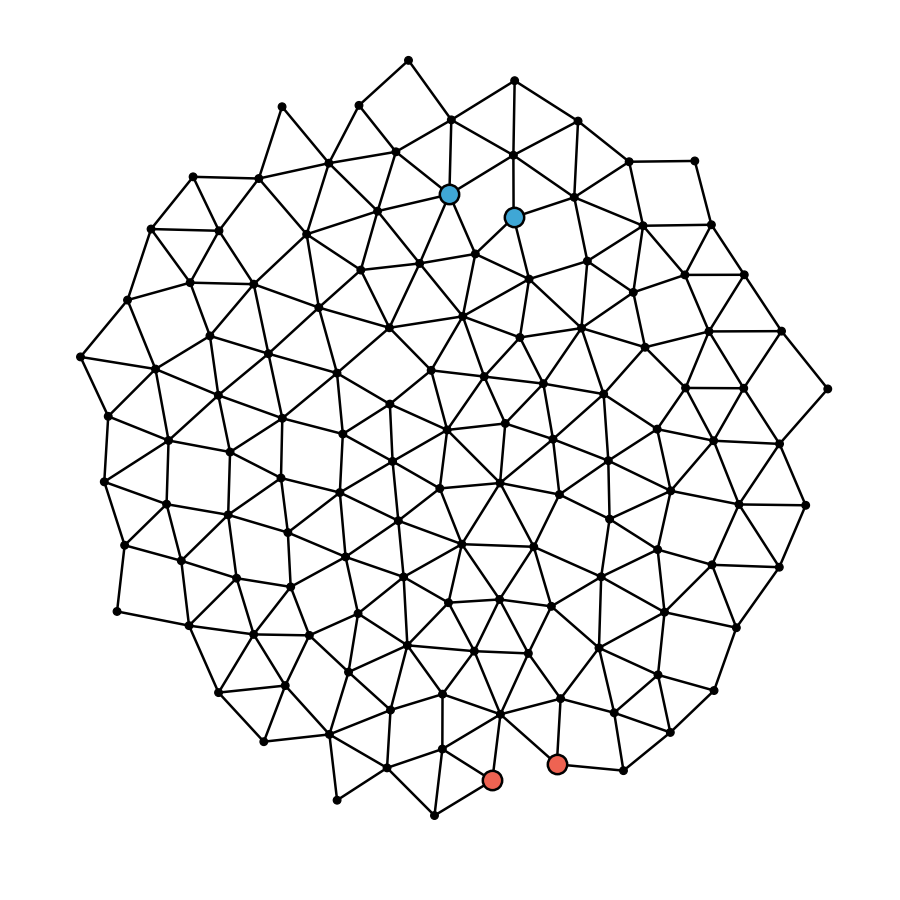

In [5]:
allo.add_targets(boundary=True)

Let's add four more targets by specifying 4 as the first argument. The selection algorithm tries to keep the sources and targets well-separated by maximizing the shortest distance to any current source or target pair.

<IPython.core.display.Javascript object>


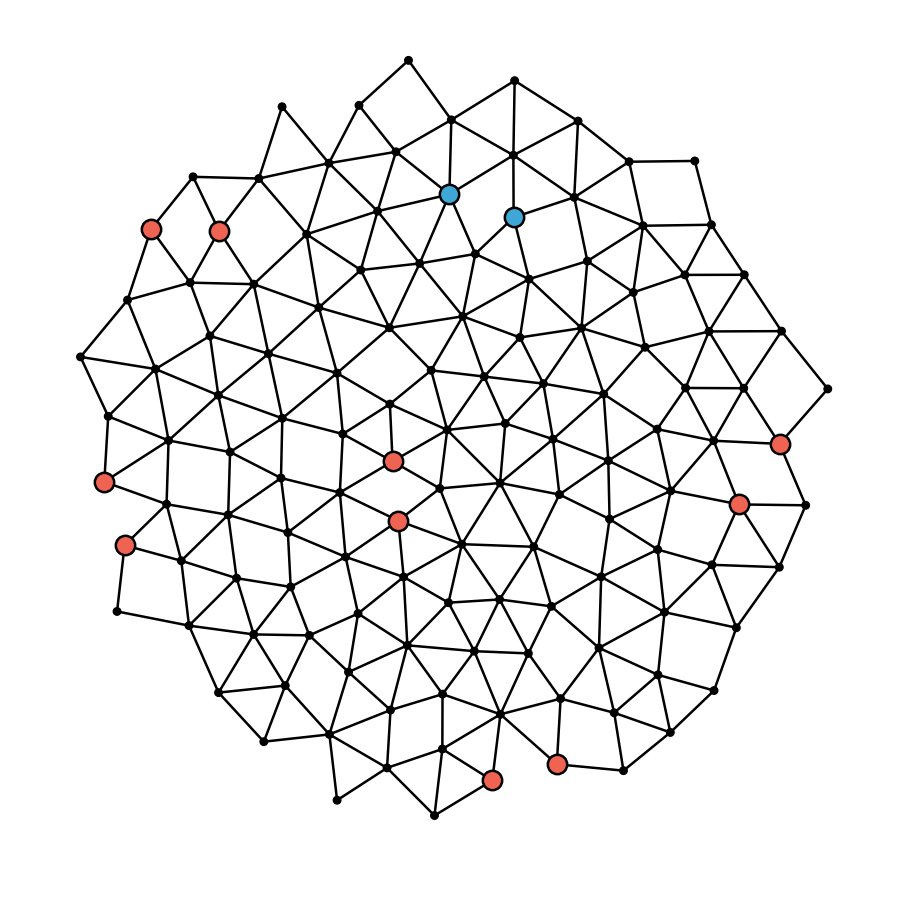

In [6]:
allo.add_targets(4)

We can save the initialized network to a file:

In [7]:
allo.save('allo_auto_{:d}.txt'.format(n))